# 环境说明

In [1]:
# 安装所需的包
install.packages("rms")

package 'rms' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AFAN\AppData\Local\Temp\Rtmpw5WgI9\downloaded_packages


In [2]:
sessionInfo()$otherPkgs$rms

NULL

# 代码实现

In [3]:
# 读取数据
data <- read.csv("data/train.csv")

In [108]:
head(data)

,Age,Blood_Sugar,Blood_Pressure,Weight,Heart_Disease
,<int>,<dbl>,<dbl>,<dbl>,<int>
1,58,99.97546,106.3281,62.44868,0
2,71,93.60951,134.1907,67.87585,0
3,48,119.13195,115.7733,49.26310,0
4,34,98.62651,117.6520,93.11179,0
5,62,114.05609,119.4568,71.04322,0
6,27,91.46011,131.4862,80.83883,0


In [109]:
# 加载所需的包
library(rms)

In [110]:
# 开始建模
model <- lrm(Heart_Disease ~ ., data = data, x=TRUE,y=TRUE)
print(model)

Logistic Regression Model

lrm(formula = Heart_Disease ~ ., data = data, x = TRUE, y = TRUE)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs          1000    LR chi2     238.07     R2       0.859    C       0.997    
 0            968    d.f.             4    R2(4,1000)0.209    Dxy     0.994    
 1             32    Pr(> chi2) <0.0001    R2(4,92.9)0.919    gamma   0.994    
max |deriv| 2e-05                           Brier    0.007    tau-a   0.062    

               Coef      S.E.    Wald Z Pr(>|Z|)
Intercept      -109.6707 24.8000 -4.42  <0.0001 
Age               0.4953  0.1116  4.44  <0.0001 
Blood_Sugar       0.5558  0.1228  4.52  <0.0001 
Blood_Pressure    0.0135  0.0213  0.63  0.5270  
Weight            0.0647  0.0307  2.11  0.0352  



In [111]:
# 计算概率预测值
probabilities <- predict(model)
# 设定阈值 0.5，将概率值转换为 0/1 分类
predicted_class <- ifelse(probabilities > 0.5, 1, 0)
# 计算准确率
accuracy <- mean(predicted_class == data$Heart_Disease)
print(paste("模型准确率:", round(accuracy, 4)))

[1] "模型准确率: 0.991"


In [112]:
# 绘制校准曲线
calibration_result <- calibrate(model, 
                                method = "boot", B = 100
                               )  # B 是 bootstrap 次数

In [113]:
head(calibration_result)

predy,calibrated.orig,calibrated.corrected,index.orig,training,test,optimism,index.corrected,n
6.487265e-24,0.00000000,3.480362e-23,-6.487265e-24,-3.651864e-24,3.115176e-23,-3.480362e-23,2.831636e-23,86
2.040545e-02,0.00000000,4.139133e-02,-2.040545e-02,-1.666564e-03,3.972476e-02,-4.139133e-02,2.098587e-02,100
4.081091e-02,0.03531016,7.041050e-02,-5.500743e-03,2.091548e-02,5.601582e-02,-3.510034e-02,2.959959e-02,100
6.121636e-02,0.09656184,1.270260e-01,3.534549e-02,4.214917e-02,7.261336e-02,-3.046419e-02,6.580968e-02,100
8.162181e-02,0.18143783,2.125110e-01,9.981602e-02,5.628458e-02,8.735778e-02,-3.107320e-02,1.308892e-01,100
1.020273e-01,0.25748856,2.850339e-01,1.554613e-01,5.662252e-02,8.416785e-02,-2.754533e-02,1.830066e-01,100


In [ ]:
tail(calibration_result)

predy,calibrated.orig,calibrated.corrected,index.orig,training,test,optimism,index.corrected,n
0.8978399,0.9019979,0.8734141,0.004157943,0.002036404,-0.026547410,0.02858381,-0.024425871,100
0.9182454,0.9280513,0.9000339,0.009805899,0.005416511,-0.022600845,0.02801736,-0.018211458,100
0.9386508,0.9542496,0.9267842,0.015598750,0.008955549,-0.018509805,0.02746535,-0.011866604,100
0.9590563,0.9806005,0.9536789,0.021544228,0.012630190,-0.014291434,0.02692162,-0.005377396,100
0.9794617,1.0070314,0.9807067,0.027569626,0.016369964,-0.009954690,0.02632465,0.001244972,100
0.9998672,1.0335309,1.0066243,0.033663726,0.020370528,-0.006536083,0.02690661,0.006757115,98


In [114]:
calibration_result[, 9]

[1]  86 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
[20] 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
[39] 100 100 100 100 100 100 100 100 100 100 100  98

In [115]:
length(calibration_result[, 9])

[1] 50


n=1000   Mean absolute error=0.004   Mean squared error=0.00046
0.9 Quantile of absolute error=0.001



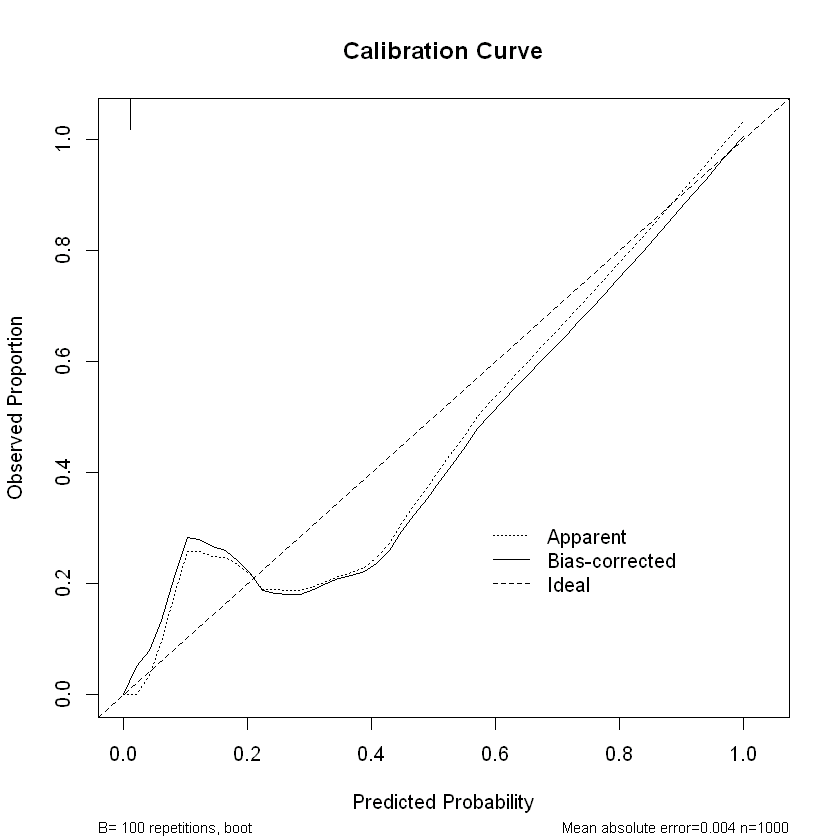

In [107]:
# 绘制校准曲线
plot(calibration_result, main = "Calibration Curve", xlab = "Predicted Probability", ylab = "Observed Proportion")

# 校准曲线计算过程

## 取出模型内容

In [11]:
non.slopes <- num.intercepts(model, 'coef')
non.slopes

[1] 1

In [12]:
x <- model[['x']]
head(x)

,Age,Blood_Sugar,Blood_Pressure,Weight
1,58,99.97546,106.3281,62.44868
2,71,93.60951,134.1907,67.87585
3,48,119.13195,115.7733,49.26310
4,34,98.62651,117.6520,93.11179
5,62,114.05609,119.4568,71.04322
6,27,91.46011,131.4862,80.83883


In [13]:
b <- model$coef
b

Intercept            Age    Blood_Sugar Blood_Pressure         Weight 
 -109.67072018     0.49532681     0.55576345     0.01347307     0.06469390

In [14]:
n <- nrow(x)
n

[1] 1000

In [15]:
orig.col.kept <- seq(along=model$coef)
orig.col.kept

[1] 1 2 3 4 5

In [16]:
  x.index <- function(i, ns)
    if(ns == 0) i else setdiff(i, 1 : ns) - ns

In [17]:
xcol <- x.index(orig.col.kept, non.slopes)
xcol

[1] 1 2 3 4

In [18]:
length(x)

[1] 4000

In [19]:
Xb <- function(x, b, non.slopes, n, kint=1) {
if(length(x)) matxv(x, b, kint=kint)
else if(non.slopes == 0 || ! length(kint)) rep(0, n)
else rep(b[kint], n)
}

In [20]:
0.495326807417277 * 58 + 0.555763449151369 * 99.97546 + 0.0134730684372247 * 106.3281 + 0.0646939048336378 * 62.44868 -109.6707201752

[1] -19.90644

In [21]:
head(matxv(x, b))

1         2         3         4         5         6 
-19.90644 -16.27866 -14.93901 -30.40770  -9.36674 -38.46541

In [22]:
length(matxv(x, b))

[1] 1000

In [23]:
xb <- Xb(x[, xcol, drop=FALSE], b, non.slopes, n,
       kint=1)
head(xb)

1         2         3         4         5         6 
-19.90644 -16.27866 -14.93901 -30.40770  -9.36674 -38.46541

In [24]:
y <- model[['y']]
head(y)

[1] 0 0 0 0 0 0

In [25]:
stra <- model$strata
stra

NULL

## Apparent计算

In [26]:
# 将线性方程的预测结果转化成predicted概率， 等价于sklearn的predict_prob
predicted <- plogis(model$linear.predictors - model$coefficients[1] + model$coefficients[1]) 
head(predicted)

[1] 2.263297e-09 8.516664e-08 3.251409e-07 6.224479e-14 8.551443e-05
[6] 1.970992e-17

In [27]:
head(model$linear.predictors)

[1] -19.90644 -16.27866 -14.93901 -30.40770  -9.36674 -38.46541

In [28]:
# 生成5个间隔的predy
if(n < 11) stop("must have n > 10 if do not specify predy")
p <- sort(predicted)
predy <- seq(p[5], p[n-4], length=50)
p <- NULL
head(predy)

[1] 6.487265e-24 2.040545e-02 4.081091e-02 6.121636e-02 8.162181e-02
[6] 1.020273e-01

In [31]:
# 计算模型名称，就是lr
clas <- attr(model,"class")
model_name <- if(any(clas=="lrm"))"lr" else if(any(clas=="ols")) "ol" else stop("fit must be from lrm or ols")
model_name

[1] "lr"

In [32]:
# 定义校准的误差结果
cal.error <- function(x, y, iter, smoother, predy, kint, model,
                        digits=NULL, ...)
    {
      if(model=="lr") {
        x <- plogis(x)
        y <- y >= kint
      }
      if(length(digits)) x <- round(x, digits)
      smo <- if(is.function(smoother)) smoother(x, y) else
       lowess(x, y, iter=0)
      cal <- approx(smo, xout=predy, ties=function(x)x[1])$y
      if(iter==0) structure(cal - predy, keepinfo=list(orig.cal=cal)) else
      cal - predy
    }

In [43]:
head(y)

[1] 0 0 0 0 0 0

In [44]:
head(plogis(xb))

1            2            3            4            5            6 
2.263297e-09 8.516664e-08 3.251409e-07 6.224479e-14 8.551443e-05 1.970992e-17

In [52]:
delta = 0.01 * diff(range(plogis(xb)))
delta

[1] 0.009999982

In [50]:
range(xb)

[1] -56.87799  13.24031

In [33]:
# 生成结果
index.orig <- cal.error(xb, y, strata=stra, fit=model, iter=0, evalfit=TRUE, smoother="lowess",
            predy=predy, model=model_name,
            kint=1)

In [34]:
# index.orig
head(index.orig)

[1] -6.487265e-24 -2.040545e-02 -5.500743e-03  3.534549e-02  9.981602e-02
[6]  1.554613e-01

In [35]:
# calibrated.orig
head(index.orig + predy)

[1] 0.00000000 0.00000000 0.03531016 0.09656184 0.18143783 0.25748856

In [36]:
head(calibration_result)

predy,calibrated.orig,calibrated.corrected,index.orig,training,test,optimism,index.corrected,n
6.487265e-24,0.00000000,2.747023e-23,-6.487265e-24,8.855879e-25,2.835582e-23,-2.747023e-23,2.098297e-23,85
2.040545e-02,0.00000000,3.461121e-02,-2.040545e-02,8.554842e-03,4.316605e-02,-3.461121e-02,1.420576e-02,100
4.081091e-02,0.03531016,7.708789e-02,-5.500743e-03,5.284404e-03,4.706214e-02,-4.177773e-02,3.627699e-02,100
6.121636e-02,0.09656184,1.349016e-01,3.534549e-02,8.982587e-03,4.732234e-02,-3.833975e-02,7.368523e-02,100
8.162181e-02,0.18143783,2.114770e-01,9.981602e-02,2.697332e-02,5.701244e-02,-3.003912e-02,1.298551e-01,100
1.020273e-01,0.25748856,2.720379e-01,1.554613e-01,4.104217e-02,5.559153e-02,-1.454937e-02,1.700107e-01,100


## Corrected计算

In [171]:
 ## some subjects have multiple records now
multi <- FALSE # ! missing(cluster) 因为没有传

n.orig <- n
n.orig

[1] 1000

In [162]:
B = 100
method = "boot"
pr=FALSE

In [157]:
pb <- setPb(B, type=if(method == 'crossvalidation') 'Cross' else 'Boot',
          onlytk=! pr,
          every=1*(B < 20) + 5*(B >= 20 & B < 50) +
            10*(B >= 50 & B < 100) + 20*(B >= 100 & B < 1000) +
            50*(B >= 1000))

In [158]:
pb

function (...) 
{
    invisible()
}
<bytecode: 0x000001c32e759470>
<environment: 0x000001c33577f710>

In [156]:
B

[1] 100

### 单轮循环

In [57]:
stra <- model$strata
stra

NULL

In [193]:
boot = {
       train <- sample(n.orig, replace=TRUE)
       test <- 1 : n
}

In [255]:
head(test)

[1] 1 2 3 4 5 6

In [256]:
length(test)

[1] 1000

In [179]:
  efit <- function(...) {
    message(...)
    list(fail=TRUE)
  }

In [183]:
penalty.matrix <- model$penalty.matrix
penalty.matrix

NULL

In [188]:
  fitit <- function(x, y, model, penalty.matrix=NULL, xcol=NULL, ...) {
    if(length(penalty.matrix) && length(xcol)) {
      if(model=='ol') xcol <- xcol[-1] - 1   # take off intercept position
      penalty.matrix <- penalty.matrix[xcol, xcol, drop=FALSE]
    }
    f <- lrm.fit(x, y, penalty.matrix=penalty.matrix, tol=.Machine$double.eps)
    if(any(is.na(f$coefficients))) f$fail <- TRUE
    f
  }

In [190]:
fit <- fitit
fit

function (x, y, model, penalty.matrix = NULL, xcol = NULL, ...) 
{
    if (length(penalty.matrix) && length(xcol)) {
        if (model == "ol") 
            xcol <- xcol[-1] - 1
        penalty.matrix <- penalty.matrix[xcol, xcol, drop = FALSE]
    }
    f <- lrm.fit(x, y, penalty.matrix = penalty.matrix, tol = .Machine$double.eps)
    if (any(is.na(f$coefficients))) 
        f$fail <- TRUE
    f
}

In [200]:
xtrain <- train
head(xtrain)

[1] 781 752 587 471 550 116

In [212]:
head(y[train , drop=FALSE])

[1] 0 0 0 0 0 0

In [211]:
stra

NULL

In [208]:
    f <- tryCatch(fit(x[xtrain, , drop=FALSE], y[train , drop=FALSE],
                      strata=stra[train], iter=i, tol=tol), error=efit)
    if(! length(f$fail)) f$fail <- FALSE
    f$assign <- NULL  #Some programs put a NULL assign (e.g. ols.val fit)
    ni <- num.intercepts(f)
    
    fail <- f$fail

In [210]:
f

Logistic Regression Model

lrm.fit(x = x, y = y, tol = .Machine$double.eps, penalty.matrix = penalty.matrix)

                       Model Likelihood      Discrimination    Rank Discrim.    
                             Ratio Test             Indexes          Indexes    
Obs          1000    LR chi2     260.90      R2       0.846    C       0.996    
 0            963    d.f.             4     R2(4,1000)0.227    Dxy     0.992    
 1             37    Pr(> chi2) <0.0001    R2(4,106.9)0.910    gamma   0.992    
max |deriv| 1e-05                            Brier    0.009    tau-a   0.071    

               Coef     S.E.    Wald Z Pr(>|Z|)
Intercept      -92.6711 21.0927 -4.39  <0.0001 
Age              0.4451  0.0965  4.61  <0.0001 
Blood_Sugar      0.4690  0.1053  4.45  <0.0001 
Blood_Pressure  -0.0045  0.0176 -0.26  0.7975  
Weight           0.0593  0.0275  2.15  0.0312  


In [209]:
fail

[1] FALSE

#### 结果正常

In [225]:
fparms  <- c(model$Design, model$terms)
fparms

$name
[1] "Age"            "Blood_Sugar"    "Blood_Pressure" "Weight"        

$label
[1] "Age"            "Blood_Sugar"    "Blood_Pressure" "Weight"        

$units
           Age    Blood_Sugar Blood_Pressure         Weight 
            ""             ""             ""             "" 

$colnames
[1] "Age"            "Blood_Sugar"    "Blood_Pressure" "Weight"        

$mmcolnames
[1] "Age"            "Blood_Sugar"    "Blood_Pressure" "Weight"        

$assume
[1] "asis" "asis" "asis" "asis"

$assume.code
[1] 1 1 1 1

$parms
list()

$limits
list()

$values
list()

$nonlinear
$nonlinear$Age
[1] FALSE

$nonlinear$Blood_Sugar
[1] FALSE

$nonlinear$Blood_Pressure
[1] FALSE

$nonlinear$Weight
[1] FALSE


$tex
list()

$interactions
NULL

[[14]]
Heart_Disease ~ Age + Blood_Sugar + Blood_Pressure + Weight
attr(,"variables")
list(Heart_Disease, Age, Blood_Sugar, Blood_Pressure, Weight)
attr(,"factors")
               Age Blood_Sugar Blood_Pressure Weight
Heart_Disease    0           0          

In [230]:
# 变量的位置
oassign <- model$assign
assign <- oassign
assign

$Age
[1] 2

$Blood_Sugar
[1] 3

$Blood_Pressure
[1] 4

$Weight
[1] 5

In [231]:
clf <- attr(f, "class")  # class is removed by c() below

In [232]:
clf

[1] "lrm"

In [233]:
non.slopes != ni

[1] FALSE

In [234]:
f$assign <- assign
f$assign

$Age
[1] 2

$Blood_Sugar
[1] 3

$Blood_Pressure
[1] 4

$Weight
[1] 5

In [235]:
  attr(f, "class") <- clf

In [236]:
bw = FALSE  
coef <- f$coef
col.kept <- seq(along=coef)

In [237]:
coef

Intercept            Age    Blood_Sugar Blood_Pressure         Weight 
 -92.671148631    0.445075970    0.469035846   -0.004504184    0.059278912

In [238]:
col.kept

[1] 1 2 3 4 5

#### 开始建模

In [240]:
xcol <- x.index(col.kept, ni)
xb <- Xb(x[,xcol,drop=FALSE], coef, ni, n, kint=1)

In [242]:
measure <- cal.error

In [247]:
train.statj <- cal.error(xb[xtrain], y[train,drop=FALSE], strata=stra[xtrain], fit=model, iter=0, evalfit=TRUE, smoother="lowess",
            predy=predy, model=model_name,
            kint=1)

In [249]:
head(train.statj)

[1]          NA -0.02040545 -0.04081091 -0.03402030  0.05560957  0.11911668

In [250]:
length(train.statj)

[1] 50

In [251]:
test.statj <- cal.error(xb[test], y[test,drop=FALSE], strata=stra[test], fit=model, iter=0, evalfit=TRUE, smoother="lowess",
            predy=predy, model=model_name,
            kint=1)

In [252]:
head(test.statj)

[1]           NA -0.020405453  0.049079384  0.028000081  0.004549510
[6] -0.001502704

In [253]:
length(test.statj)

[1] 50

### 多轮循环

In [74]:
head(calibration_result)

predy,calibrated.orig,calibrated.corrected,index.orig,training,test,optimism,index.corrected,n
6.487265e-24,0.00000000,2.993233e-23,-6.487265e-24,6.026968e-26,2.999260e-23,-2.993233e-23,2.344507e-23,89
2.040545e-02,0.00000000,4.285074e-02,-2.040545e-02,3.424477e-03,4.627522e-02,-4.285074e-02,2.244529e-02,100
4.081091e-02,0.03531016,7.634971e-02,-5.500743e-03,2.321574e-02,6.425529e-02,-4.103955e-02,3.553880e-02,100
6.121636e-02,0.09656184,1.361604e-01,3.534549e-02,3.323673e-02,7.283529e-02,-3.959856e-02,7.494404e-02,100
8.162181e-02,0.18143783,2.124165e-01,9.981602e-02,4.689570e-02,7.787440e-02,-3.097871e-02,1.307947e-01,100
1.020273e-01,0.25748856,2.824633e-01,1.554613e-01,4.436548e-02,6.934022e-02,-2.497474e-02,1.804360e-01,100
